
# iDDBSCAN (python vs cython)

### Time measurement of the algorithm in python and cython





In [1]:
# Importing Libraries 

from __future__ import division
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN 
from ddbscan_ import DDBSCAN as ddp
from ddbscan_cython import DDBSCAN as ddc

In [2]:
# Importing data to test the clustering algorithms
X = np.load('Events/data240.npy')

# Parameters
eps = 5.8
epsransac = 15.5
min_pts = 30


start = time.time()
clusters_db = DBSCAN(eps=eps,min_samples=min_pts).fit(X)
final = time.time()

print('The DBSCAN algorithm from sklearn needed %f seconds' %(final-start))

start = time.time()
clusters_py = ddp(eps=eps, epsransac = epsransac, min_samples=min_pts).fit(X)
final = time.time()

print('The iDDBSCAN algorithm written in python needed %f seconds' %(final-start))

start = time.time()
clusters_cy = ddc(eps=eps,epsransac = epsransac, min_samples=min_pts).fit(X)
final = time.time()

print('The iDDBSCAN algorithm written in cython needed %f seconds' %(final-start))



The DBSCAN algorithm from sklearn needed 0.009983 seconds
Clusters found in DBSCAN: 11
The ddbscaninner needed 0 seconds.
The iDDBSCAN algorithm written in python needed 0.073883 seconds
Clusters found in DBSCAN: 11
The iDDBSCAN algorithm written in cython needed 0.064330 seconds


Text(0.5,1,'iDDBSCAN with cython output')

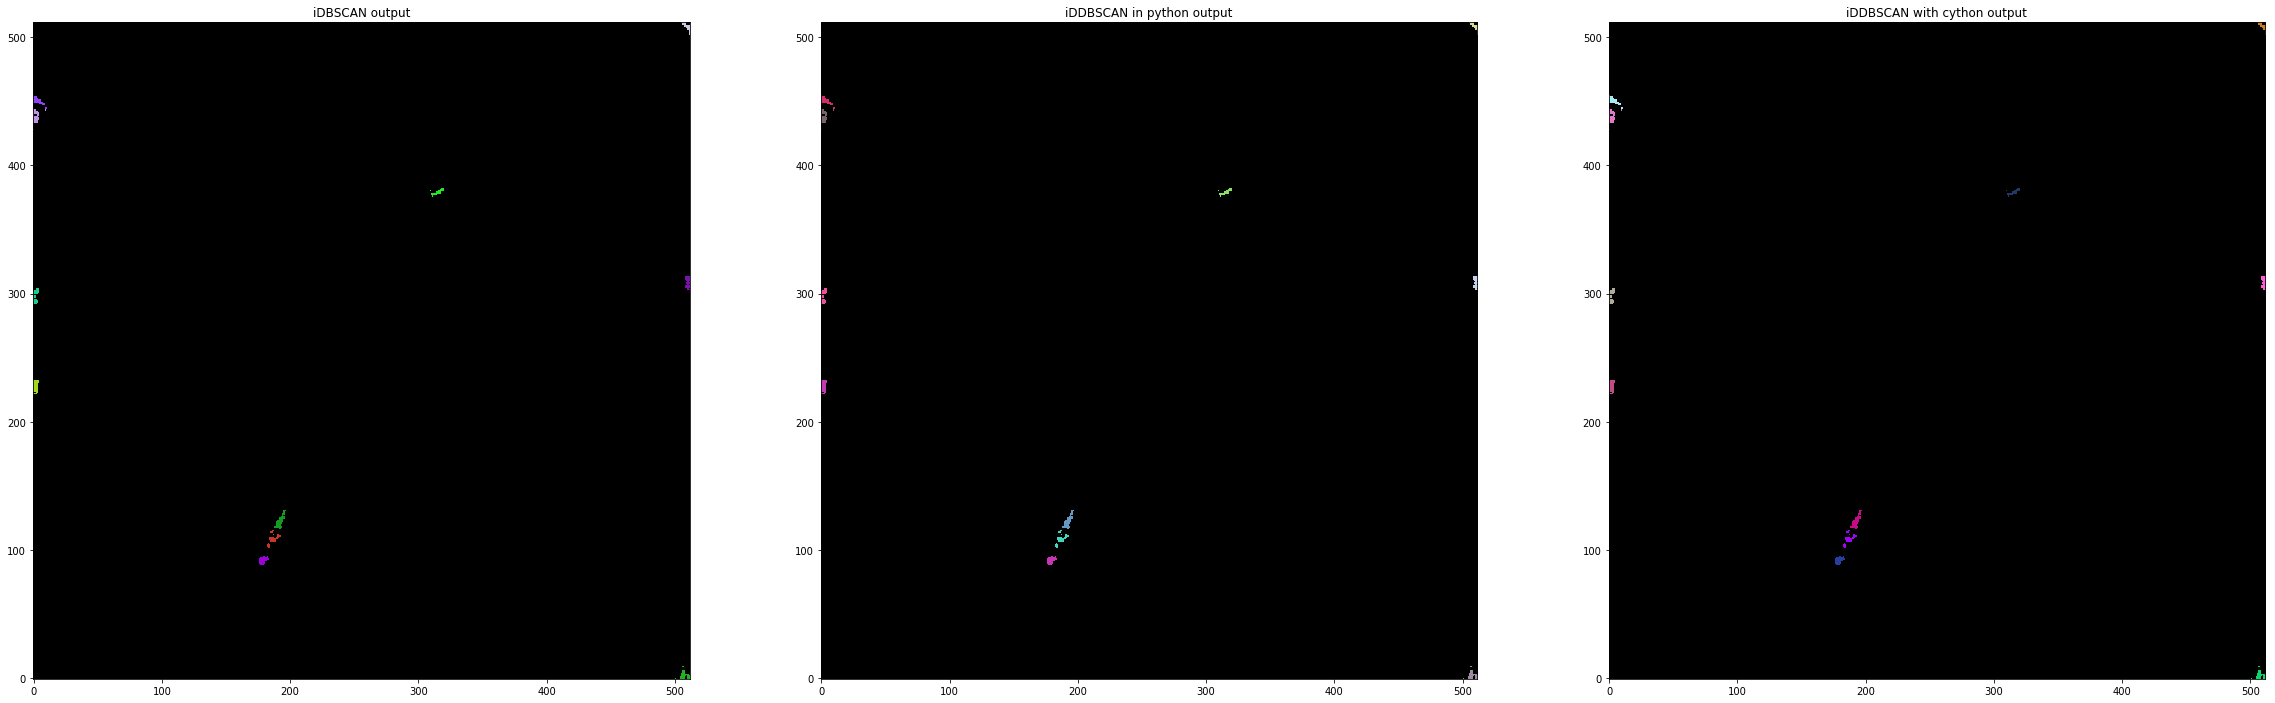

In [3]:
#Plotting the images
clu_db = [X[clusters_db.labels_ == i] for i in range(len(set(clusters_db.labels_)) - (1 if -1 in clusters_db.labels_ else 0))]
clu_py = [X[clusters_py.labels_[:,0] == i] for i in range(len(set(clusters_py.labels_[:,0])) - (1 if -1 in clusters_py.labels_[:,0] else 0))]
clu_cy = [X[clusters_cy.labels_[:,0] == i] for i in range(len(set(clusters_cy.labels_[:,0])) - (1 if -1 in clusters_cy.labels_[:,0] else 0))]

f,ax = plt.subplots(1,3,figsize=(40,20))
image_db = np.zeros([512,512,3])
image_py = np.zeros([512,512,3])
image_cy = np.zeros([512,512,3])
for cluster in clu_db:
    a = np.random.rand(3)
    image_db[cluster[:,0],cluster[:,1]] = a

for cluster in clu_py:
    a = np.random.rand(3)
    image_py[cluster[:,0],cluster[:,1]] = a

for cluster in clu_cy:
    a = np.random.rand(3)
    image_cy[cluster[:,0],cluster[:,1]] = a

ax[0].imshow(image_db, cmap='gray', origin='lower' )
ax[0].set_title("iDBSCAN output")
ax[1].imshow(image_py,cmap='gray', origin='lower')
ax[1].set_title('iDDBSCAN in python output')
ax[2].imshow(image_cy,cmap='gray', origin='lower')
ax[2].set_title('iDDBSCAN with cython output')

In [6]:
sum(clusters_py.labels_[:,0] != clusters_cy.labels_[:,0])

60